<a href="https://colab.research.google.com/github/Lenakirara/Bootcamp_Dados_MIA/blob/main/New_York_City_Taxi_Fare_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New York City Taxi Fare Prediction

O objetivo deste projeto prátco é realizar a predição do valor da tarifa para uma corrida de táxi na cidade de Nova York.


## Base de dados utilizada

- Kaggle: [New York City Taxi Fare Prediction](https://www.kaggle.com/competitions/new-york-city-taxi-fare-prediction/overview)

## Descrição do conjunto de dados

| Campo | Descrição |
|-------|-----------|
| key | chave única indicando cada exemplo |
| fare_amount | valor, em doláres, indicando o valor pago na corrida de táxi |
| pickup_datetime | timestamp indicando quando a corrida começou |
| pickup_longitude | longitude na qual a corrida de táxi começou |
| pickup_latitude | latitude na qual a corrida de táxi começou |
| dropoff_longitude | longitude na qual a corrida de táxi acabou |
| dropoff_latitude | latitude na qual a corrida de táxi acabou |
| passenger_count	| número de passageiros |

## Importando Bibliotecas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np

In [ ]:
import warnings
warnings.simplefilter(action='ignore')

## Buscando o Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MIA/aula5/dataset.csv')
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [ ]:
df.shape

(1000000, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   key                1000000 non-null  object 
 1   fare_amount        1000000 non-null  float64
 2   pickup_datetime    1000000 non-null  object 
 3   pickup_longitude   1000000 non-null  float64
 4   pickup_latitude    1000000 non-null  float64
 5   dropoff_longitude  999990 non-null   float64
 6   dropoff_latitude   999990 non-null   float64
 7   passenger_count    1000000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 61.0+ MB


## Análise exploratória e Feature engineering


### Valores Faltantes

In [ ]:
print(f'Tamanho do conjunto de dados (antes da remoção de valores faltantes): {len(df)}')
df.dropna(inplace=True)
print(f'Tamanho do conjunto de dados (depois da remoção de valores faltantes): {len(df)}')

Tamanho do conjunto de dados (antes da remoção de valores faltantes): 1000000
Tamanho do conjunto de dados (depois da remoção de valores faltantes): 999990


Nota-se que valores faltantes totalizam apenas 10.

### Distribuição das features

In [ ]:
# distribuição da variáveis
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
key,999990,999990,2009-06-15 17:26:21.0000001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fare_amount,999990.0,NaN,NaN,NaN,11.347953,9.82179,-44.9,6.0,8.5,12.5,500.0
pickup_datetime,999990,861747,2010-02-13 19:28:00 UTC,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pickup_longitude,999990.0,NaN,NaN,NaN,-72.526699,12.057778,-3377.680935,-73.99206,-73.981792,-73.967094,2522.271325
pickup_latitude,999990.0,NaN,NaN,NaN,39.92904,7.626087,-3116.285383,40.734965,40.752695,40.767154,2621.62843
dropoff_longitude,999990.0,NaN,NaN,NaN,-72.52786,11.324494,-3383.296608,-73.991385,-73.980135,-73.963654,45.581619
dropoff_latitude,999990.0,NaN,NaN,NaN,39.919954,8.201418,-3114.338567,40.734046,40.753166,40.768129,1651.553433
passenger_count,999990.0,NaN,NaN,NaN,1.684941,1.323907,0.0,1.0,1.0,2.0,208.0


**Algumas análises**
- Na coluna 'passenger_count' notamos um discrepância no valor -> Número máximo de passageiros em uma corrida com total de 208?
- O target 'fare_amount' está com alguns valores negativos.

## Análise das features (e do target)



### fare_amount

Começamos pelo target, e assim podemos visualizar sua distribuição.

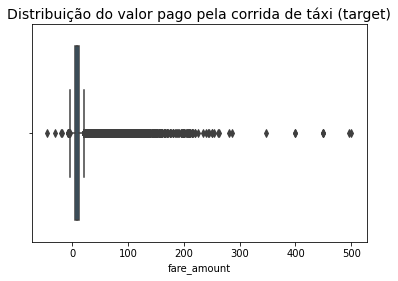

In [ ]:
sns.boxplot(df.fare_amount).set_title('Distribuição do valor pago pela corrida de táxi (target)', fontsize=14);

- Temos corridas que custam menos de 1 dolar e corridas com valores negativos.

In [ ]:
len(df.loc[(df.fare_amount < 1)])

75

- Total de 75 exemplos com valores a baixo de 1 dolar

In [ ]:
len(df.loc[(df.fare_amount > 100)])

396

- 396 exemplos possuem valores da corrida acima de 100 dolares.


### Removendo esses casos discrepantes

In [ ]:
df = df.loc[(df.fare_amount >= 1) & (df.fare_amount <= 100)]

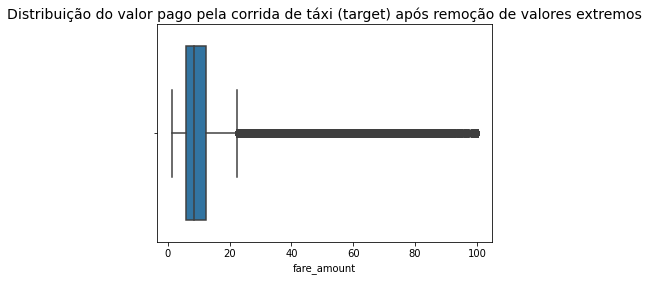

In [ ]:
sns.boxplot(df.fare_amount).set_title("Distribuição do valor pago pela corrida de táxi (target) após remoção de valores extremos", fontsize=14);

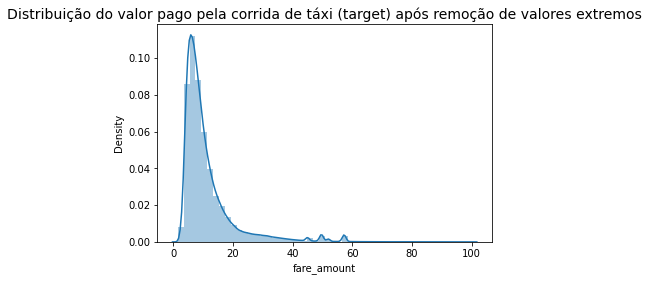

In [ ]:
sns.distplot(df.fare_amount).set_title("Distribuição do valor pago pela corrida de táxi (target) após remoção de valores extremos", fontsize=14);

- Notamos uma concentração maior de corrida de até 20 dólares.
- 75% do conjunto de dados temos corridas com valor até 12,5 dólares.
- Entre 40 e 60 dólares temos alguns picos.


### pickup_datetime


In [ ]:
# convertendo os valores de data - object para  datetime64
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'],format='%Y-%m-%d %H:%M:%S UTC')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999519 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   key                999519 non-null  object        
 1   fare_amount        999519 non-null  float64       
 2   pickup_datetime    999519 non-null  datetime64[ns]
 3   pickup_longitude   999519 non-null  float64       
 4   pickup_latitude    999519 non-null  float64       
 5   dropoff_longitude  999519 non-null  float64       
 6   dropoff_latitude   999519 non-null  float64       
 7   passenger_count    999519 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 68.6+ MB


Mesmo com essa conversão, ainda não conseguimos usar essa informação. Podemos separá-la em várias features diferentes (horário, dia da semana, dia, mês, ano):

In [ ]:
# horário
df['pickup_hour']=df['pickup_datetime'].apply(lambda x:x.hour)
# dia da semana (0 é segunda e 6 é domingo)
df['pickup_day_of_week']=df['pickup_datetime'].apply(lambda x:x.weekday())
# dia
df['pickup_day']=df['pickup_datetime'].apply(lambda x:x.day)
# mês
df['pickup_month']=df['pickup_datetime'].apply(lambda x:x.month)
# ano
df['pickup_year']=df['pickup_datetime'].apply(lambda x:x.year)

In [ ]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_hour,pickup_day_of_week,pickup_day,pickup_month,pickup_year
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,17,0,15,6,2009
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,16,1,5,1,2010
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,0,3,18,8,2011
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,4,5,21,4,2012
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,7,1,9,3,2010


In [ ]:
fig_size = (18,8)
font_size = 16
title_font_size = 20

### Horário

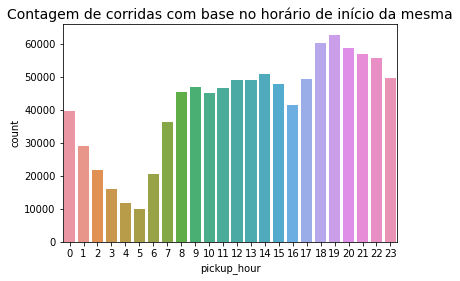

In [ ]:
# utilizando countplot -> contagem
sns.countplot(df['pickup_hour']).set_title("Contagem de corridas com base no horário de início da mesma", fontsize=14);

In [ ]:
def sns_catplot_df(x_var, y_var, title):
  fig = plt.figure(figsize=fig_size)
  sns.catplot(x=x_var,
              y=y_var,
              kind="bar",
              data=df)
  plt.xlabel(x_var, fontsize = font_size)
  plt.ylabel(y_var, fontsize = font_size)
  plt.title(title, fontsize = title_font_size);

<Figure size 1296x576 with 0 Axes>

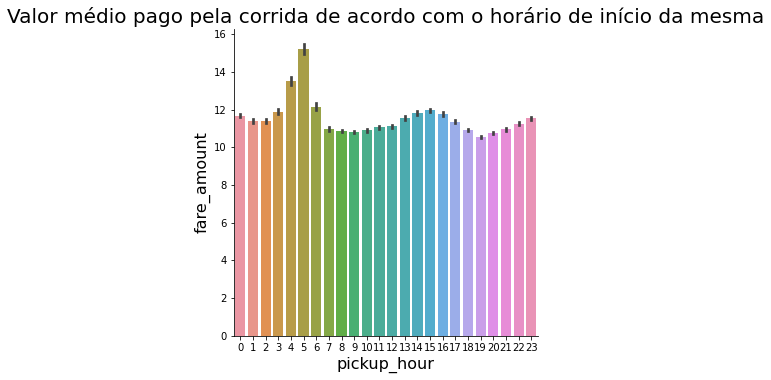

In [ ]:
sns_catplot_df('pickup_hour', 'fare_amount', 'Valor médio pago pela corrida de acordo com o horário de início da mesma');

- Temos uma redução da quantidade de corrida no periodo da madrugada.
- Nos demais horários a quantidade de corrida são maiores.


### Dia da semana

In [ ]:
# Vamos fazer a conversão dos dias da semana para facilitar a leitura
def convert_day_of_week(day_of_week):
    day_dict={0:'Segunda',1:'Terça',2:'Quarta',3:'Quinta',4:'Sexta',5:'Sábado',6:'Domingo'}
    return day_dict[day_of_week]


In [ ]:
df['pickup_day_of_week_name']=df['pickup_day_of_week'].apply(lambda x:convert_day_of_week(x))

In [ ]:
week_day_name = ['Segunda','Terça','Quarta','Quinta','Sexta','Sábado','Domingo']

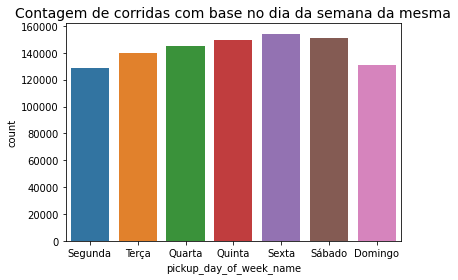

In [ ]:
sns.countplot(df['pickup_day_of_week_name'],
              order=week_day_name).set_title("Contagem de corridas com base no dia da semana da mesma", fontsize=14);

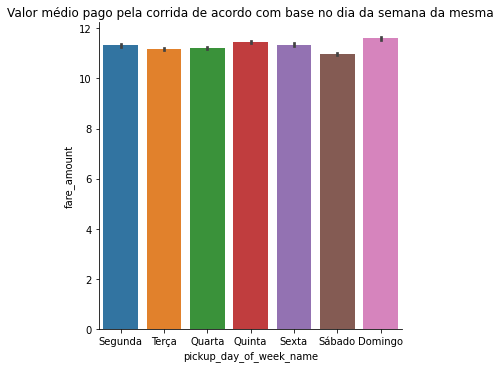

In [ ]:
sns.catplot(x="pickup_day_of_week_name",
            y="fare_amount",
            data=df,
            order=week_day_name,kind="bar").set(title="Valor médio pago pela corrida de acordo com base no dia da semana da mesma");

- Nas sextas-feiras temos um pico no número de corridas.
- No domingo os valores pagos em corridas são um pouco maiores.


### Dia

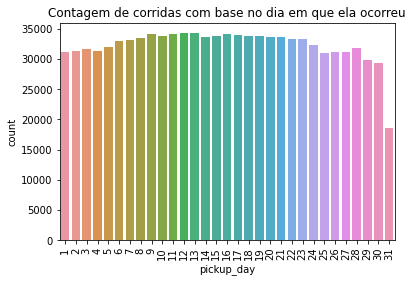

In [ ]:
sns.countplot(df['pickup_day']).set_title("Contagem de corridas com base no dia em que ela ocorreu");
plt.xticks(rotation=90);

<Figure size 1296x576 with 0 Axes>

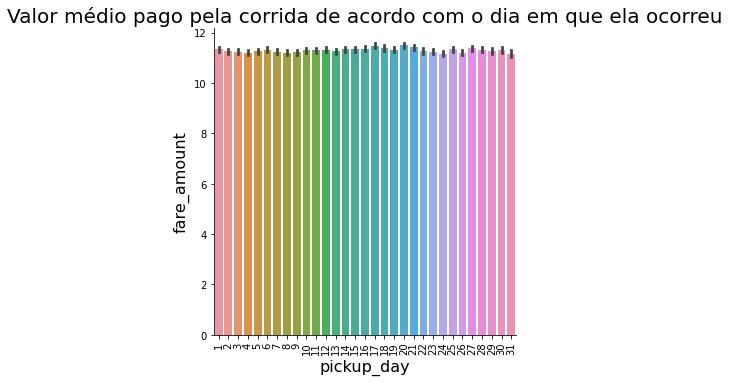

In [ ]:
sns_catplot_df('pickup_day', 'fare_amount', 'Valor médio pago pela corrida de acordo com o dia em que ela ocorreu')
plt.xticks(rotation=90);

- Temos menos corridas nos dias 31. Lembrando que nem todos os meses vão até 31 dias.
- A média dos valores pagos por dia da semana, ainda não conseguimos notar uma clara diferença.


### Mês

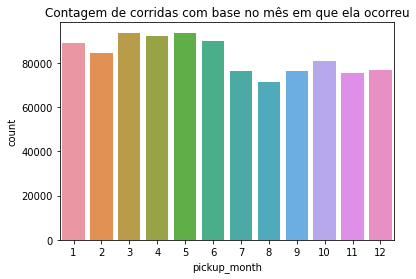

In [ ]:
sns.countplot(df['pickup_month']).set_title("Contagem de corridas com base no mês em que ela ocorreu");

<Figure size 1296x576 with 0 Axes>

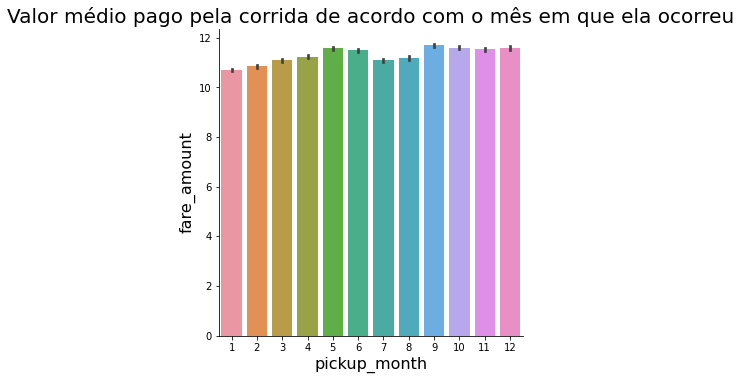

In [ ]:
sns_catplot_df('pickup_month', 'fare_amount', 'Valor médio pago pela corrida de acordo com o mês em que ela ocorreu');

Com relação ao mês, aparentemente mais corridas de táxi são feitas no primeiro semestre do que no segundo. Já em relação à média do valor pago, os meses do começo do ano e do meio do ano parecem ter valores menores do que os demais meses.

- Verificar qual período faz parte deste dataset

In [ ]:
period_year_2015 = df.query('pickup_year == 2015')['pickup_month']
period_year_2015.head()

31    6
35    1
36    3
68    4
69    5
Name: pickup_month, dtype: int64

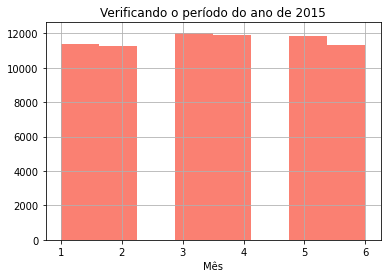

In [ ]:
period_year_2015.hist(bins=8, color='salmon')
plt.title('Verificando o período do ano de 2015')
plt.xlabel('Mês');

- O período do ano de 2015 foram coletados dados até o mês de junho.

### Ano

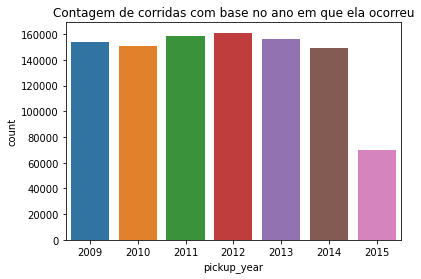

In [ ]:
sns.countplot(df['pickup_year']).set_title("Contagem de corridas com base no ano em que ela ocorreu");

<Figure size 1296x576 with 0 Axes>

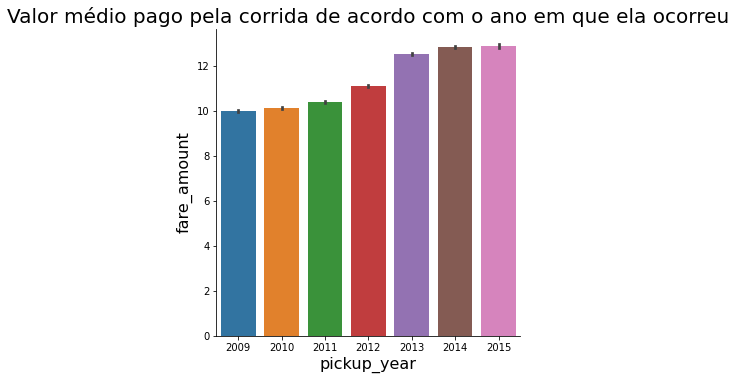

In [ ]:
sns_catplot_df('pickup_year', 'fare_amount', 'Valor médio pago pela corrida de acordo com o ano em que ela ocorreu');

- Em 2015 temos uma quantidade menor de corridas. Hipótese: os dados podem tem sido coletados a partir da metade deste ano de 2015.
- Com relação ao valor pago, podemos notar que há uma tendência de crescimento na média do valor pago pela corrida conforme os anos vão passando.


### Latitude e Longitude

In [ ]:
df[['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']].describe()

,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
count,999519.000000,999519.000000,999519.000000,999519.000000
mean,39.930365,-72.529162,39.921741,-72.531198
std,7.623472,12.051418,8.198080,11.314573
min,-3116.285383,-3377.680935,-3114.338567,-3383.296608
25%,40.734977,-73.992061,40.734055,-73.991382
50%,40.752697,-73.981796,40.753166,-73.980136
75%,40.767151,-73.967110,40.768122,-73.963666
max,2621.628430,2522.271325,1651.553433,45.581619


<font color=orange>**Obs.:**
As coordenadas de latitude variam apenas entre -90 e 90.<br>
Coordenadas de longitude varia apenas entre -180 e 180.</font>
<br><br>
- Podemos excluir todos os exemplos cujas longitudes e latitudes estão fora dos intervalos observados acima.

In [ ]:
# excluindo os casos discrepantes
print(f'Tamanho conjunto de dados (antes da remoção de valores faltantes): {len(df)}')
df = df.loc[(df.pickup_latitude>=-90) & (df.pickup_latitude<=90)]
df = df.loc[(df.pickup_longitude>=-180) & (df.pickup_longitude<=180)]
df = df.loc[(df.dropoff_latitude>=-90) & (df.dropoff_latitude<=90)]
df = df.loc[(df.dropoff_longitude>=-180) & (df.dropoff_longitude<=180)]
print(f'Tamanho conjunto de dados (depois da remoção de valores faltantes): {len(df)}')

Tamanho conjunto de dados (antes da remoção de valores faltantes): 999519
Tamanho conjunto de dados (depois da remoção de valores faltantes): 999479


<font color=red>- Podemos substituir esse valores discrepantes pelo máximo e pelo mínimo da longitude e latitude</font>


In [ ]:
df[['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']].describe()

,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
count,999479.000000,999479.000000,999479.000000,999479.000000
mean,39.928068,-72.519762,39.927656,-72.518556
std,6.085292,10.385367,6.088085,10.386105
min,-74.016587,-128.175950,-74.035197,-121.391248
25%,40.734977,-73.992060,40.734055,-73.991382
50%,40.752697,-73.981796,40.753165,-73.980136
75%,40.767151,-73.967110,40.768122,-73.963666
max,69.400000,40.850357,81.510177,45.581619


### Pontos de origem da corrida

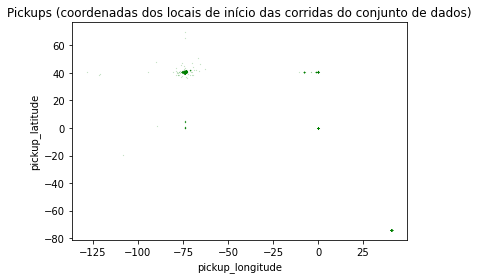

In [ ]:
df.plot(kind='scatter', x='pickup_longitude', y='pickup_latitude',
                color='green',
                s=.02, alpha=.6)
plt.title("Pickups (coordenadas dos locais de início das corridas do conjunto de dados)");

Conforme podemos notar no gráfico acima, parece que algumas corridas ainda são outliers, visto que estão muito distantes das demais, um indício de que essas viagens não tiveram origem na cidade de New York. Vamos remover os casos de pontos que não estão no intervalo abaixo:

In [ ]:
# corte para termos noção melhor da longitude e latitude
long_interval = (-74.04, -73.75)
lat_interval = (40.63, 40.88)

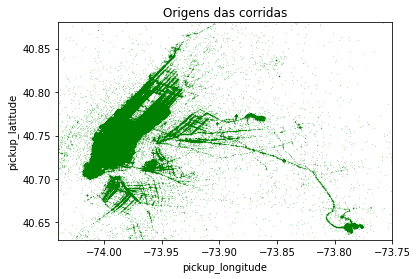

In [ ]:
df.plot(kind='scatter', x='pickup_longitude', y='pickup_latitude',
                color='green',
                s=.02, alpha=.6)
plt.title("Origens das corridas")
plt.ylim(lat_interval)
plt.xlim(long_interval);

Vamos então filtrar novamente as longitudes e latitudes para considerar somente esses intervalos:

In [ ]:
# excluindo quem está fora desse limiar - tivemos lagumas perdas de dados
print(f'Tamanho conjunto de dados (antes da remoção de valores faltantes): {len(df)}')
df = df.loc[(df.pickup_latitude>=40.63) & (df.pickup_latitude<=40.88)]
df = df.loc[(df.pickup_longitude>=-74.04) & (df.pickup_longitude<=-73.75)]
df = df.loc[(df.dropoff_latitude>=40.63) & (df.dropoff_latitude<=40.88)]
df = df.loc[(df.dropoff_longitude>=-74.04) & (df.dropoff_longitude<=-73.75)]
print(f'Tamanho conjunto de dados (depois da remoção de valores faltantes): {len(df)}')

Tamanho conjunto de dados (antes da remoção de valores faltantes): 999479
Tamanho conjunto de dados (depois da remoção de valores faltantes): 970979


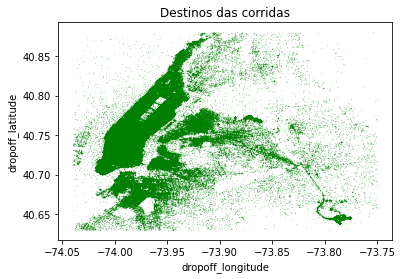

In [ ]:
df.plot(kind='scatter',
        x='dropoff_longitude',
        y='dropoff_latitude',
        color='green',
        s=.02,
        alpha=.6)
plt.title("Destinos das corridas");

### Pontos de destino da corrida

Comparando com o "mapa" das origens, conseguimos ver que há mais destinos fora de Manhattan, o que indica que muitas corridas começam em Manhattan e terminar no Brooklyn e no Queens.

Além dessa limpeza de outliers, também podemos criar novas variáveis, como as de diferenças absolutas entre as latitudes e as longitudes de origem e destino das corridas:

In [ ]:
# ponto de origem ate o destino
df['abs_diff_longitude'] = (df.dropoff_longitude - df.pickup_longitude).abs()
df['abs_diff_latitude'] = (df.dropoff_latitude - df.pickup_latitude).abs()

<font color=red>Calcular a distancia</font>

In [ ]:
df[['abs_diff_latitude', 'abs_diff_longitude']].describe()

,abs_diff_latitude,abs_diff_longitude
count,970979.000000,970979.000000
mean,0.020785,0.022129
std,0.021742,0.032358
min,0.000000,0.000000
25%,0.006921,0.006116
50%,0.014084,0.012630
75%,0.026880,0.023665
max,0.237560,0.260020


### passenger_count

- Conforme vimos, há casos de corridas com 208 passageiros
- E também corridas sem passageiros.

Vamos supor que todos os carros de táxi só cabem 5 pessoas e, como já há o motorista, o número de passageiros deve ser no máximo 4. Assim, vamos excluir do nosso conjunto de dados os casos de corridas sem passageiros ou com mais de 4

In [ ]:
len(df.loc[df.passenger_count<1])

3466

In [ ]:
len(df.loc[df.passenger_count>4])

89097

In [ ]:
df = df.loc[(df.passenger_count > 0) & (df.passenger_count<5)]

df = df.loc[(df.passenger_count > 1) & (df.passenger_count<5)]
- colocar 1

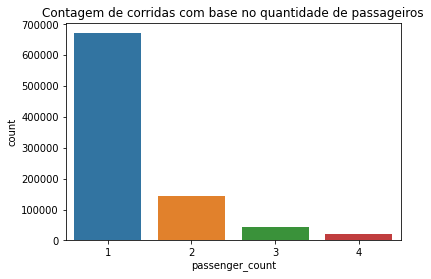

In [ ]:
sns.countplot(df['passenger_count']).set_title("Contagem de corridas com base no quantidade de passageiros");

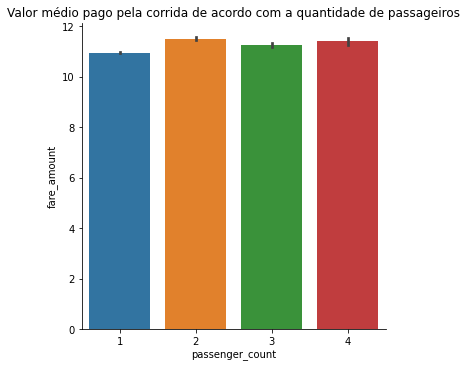

In [ ]:
sns.catplot(x="passenger_count",
            y="fare_amount",
            data=df,
            kind="bar").set(title="Valor médio pago pela corrida de acordo com a quantidade de passageiros");

- São pouquíssimas as corridas com 4 passageiros;
- A maioria absoluta das corridas possui 1 passageiro.
- Com relação ao valor pago, essas corridas com somente um passageiro parecem ter uma média ligeiramente menor do que as corridas com mais passageiros.

## Correlação

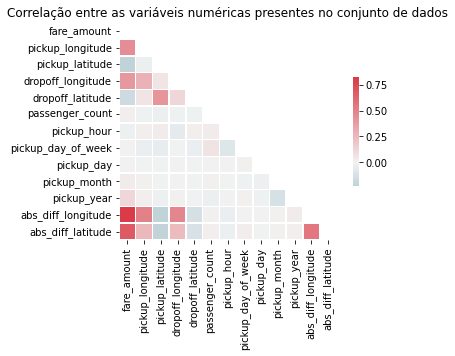

In [ ]:
# Generate a mask for the upper triangle
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df.corr(),
            mask=mask,
            cmap=cmap,
            center=0,
            square=True,
            linewidths=.5,
            cbar_kws={"shrink": .5}).set_title("Correlação entre as variáveis numéricas presentes no conjunto de dados");

- Na matriz de correlação acima, as features que criadas referentes às coordenadas de latitude e longitude são as mais correlacionadas com o nosso target 'fare_amount'.

<font color=red>
- Ver os dias de feriados nos Estados Unidos
- Tempo no horário do ínicio da corrida (se estava chovendo, muito frio, etc.)
- Calcular a distância entre os pontos de origem e destino da corrida
- Proximidade com estação de metrô</font>




## Regressão Linear Simples


In [ ]:
from sklearn.linear_model import LinearRegression

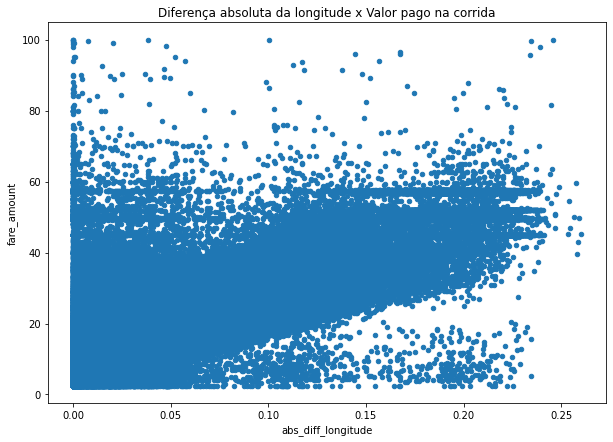

In [ ]:
# Variável target x variável com a diferença absoluta entre as longitudes de origem e destino
_ = df.plot.scatter(x='abs_diff_longitude', y='fare_amount', figsize=(10, 7))
_ = plt.title('Diferença absoluta da longitude x Valor pago na corrida')

In [ ]:
df.fare_amount.corr(df.abs_diff_longitude)

0.8250564877600102

Aparentemente, essa feature é uma boa indicadora para o preço da corrida, visto que a correlação é alta e parece haver uma tendência de que, quanto maior a a diferença da longitude, maior é o preço.

### Separação do conjunto de treino e teste

In [ ]:
Y = df['fare_amount']
# estamos retirando do X
# não podemos deixar o modelo aprender pelo target. Evitar vazar resposta para o modelo
del df['fare_amount']
X = df

- Teremos uma base que será vista pelo modelo, assim podermos verificar se o nosso modelo generalizou ou decorou o conjunto de dados.
- Separar os conjuntos em treino e teste: Saber o que são variáveis e o que são os targets
- Treino: usado para treinar o modelo
- Teste: usado para avaliar se o modelo está bom.



In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 42)

In [ ]:
print(X_train.shape)
X_train.head(1)

(614891, 15)


,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_hour,pickup_day_of_week,pickup_day,pickup_month,pickup_year,pickup_day_of_week_name,abs_diff_longitude,abs_diff_latitude
401364,2015-04-01 09:35:10.0000001,2015-04-01 09:35:10,-73.90744,40.753376,-73.930832,40.744534,1,9,2,1,4,2015,Quarta,0.023392,0.008842


In [ ]:
print(Y_train.shape)
Y_train.head(1)

(614891,)


401364    8.0
Name: fare_amount, dtype: float64

In [ ]:
print(X_test.shape)
X_test.head(1)

(263525, 15)


,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_hour,pickup_day_of_week,pickup_day,pickup_month,pickup_year,pickup_day_of_week_name,abs_diff_longitude,abs_diff_latitude
823733,2011-02-26 20:26:00.000000110,2011-02-26 20:26:00,-73.862735,40.76883,-73.969447,40.797897,1,20,5,26,2,2011,Sábado,0.106712,0.029067


In [ ]:
print(Y_test.shape)
Y_test.head(1)

(263525,)


823733    28.1
Name: fare_amount, dtype: float64

### Treinamento do modelo

modelo **fit** -> aprender com dados que de treino (Iremos ensinar o modelo)

In [ ]:

# instancia a regressão linear
lm = LinearRegression()
# como vamos utilizar somente uma feature, vamos passar somente ela para treinar o modelo
# 'abs_diff_longitude'=>> variável para realizar a predição
lm.fit(X_train[['abs_diff_longitude']], Y_train)

LinearRegression()

### Predição

modelo **predict** -> pega o modelo que acabou de treinar e gerar as predições com base no que foi apendido

In [ ]:
# para fazer a predição também só devemos utilizar a feature fornecida no treinamento
Y_pred = lm.predict(X_test[['abs_diff_longitude']])

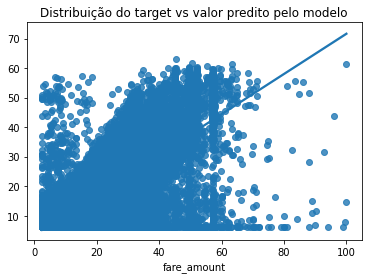

In [ ]:
_ = sns.regplot(x=Y_test, y=Y_pred).set_title("Distribuição do target vs valor predito pelo modelo");

De acordo com gráfico
- Notamos que alguns valores reais de 100 dólares e modelo fez predição em torno de 60 dólares.
Existe algumas diferenças passadas pelo modelo com relação ao valor real.

In [ ]:
# vamos pegar de exemplo o caso em que a diferença das longitudes é de 0.1067120000000017
example = X_test[['abs_diff_longitude']].iloc[0][0]
example

0.1067120000000017

In [ ]:
# aqui conseguimos pegar os coeficientes que compõem a equação da regressão linear
beta=lm.coef_
intercept=lm.intercept_
print(beta)
print(intercept)

[225.37880345]
6.081784576615072


In [ ]:
# Y = (225.37880345 * example) + 6.081784576615056
(beta[0] * example) + intercept

30.13240745082181

Substituindo os valores na fórmula, temos que esse passageiro teria pago cerca de 30 dólares na corrida. E esse valor da fórmula foi exatamente a mesma coisa que nosso modelo predisse:


In [ ]:
Y_pred[0]

30.13240745082181

Há mais duas informações interessantes que podemos observar com os coeficientes:

- Cada vez que a diferença da longitude aumenta em 1, o preço da corrida aumenta em 225 dólares (calma que a diferença das longitudes não é tão alta assim!).
- Além disso, podemos notar que se a origem e o destino do passageiro fossem o mesmo, ele pagaria 6 dólares.<br>

Conforme tinhamos visto mais acima no notebook, a média da diferença da longitude é de 0.022119. Podemos usar esse número na fórmula que vimos no início da aula para calcular os valores que seriam preditos para a média das viagens:

In [ ]:
(beta * 0.022119) + intercept

array([11.06693833])

Para a média das viagens então, o nosso modelo iria predizer que o valor da corrida seria de quase 11 dólares.

<h3>Métricas de avaliação<h3>


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### MSE

O MSE calcula o erro quadrático médio das predições do nosso modelo. Quanto maior o MSE, pior é o modelo.

Essa métrica é útil quando temos valores de target mais incomuns e que seriam interessantes que nosso modelo não errasse.

Por outro lado, como os erros são penalizados exponencialmente, erros maiores tem um peso maior do que os erros menores. Então, se o nosso modelo faz apenas uma predição muito, muito ruim, o MSE irá elevar esse erro ao quadrado e, com isso, esse erro ficará ainda pior e acabaremos achando que o nosso modelo está performando pior do que realmente está.

Outro ponto é que a escala do MSE não é a mesma do nosso target (visto que os erros são elevados ao quadrado), então sua interpretação fica mais difícil.

In [ ]:
mse = mean_squared_error(Y_test, Y_pred)
mse

24.697109703696587

### MAE

O MAE calcula a média da diferença absoluta entre o valor predito e o valor real. Nesse caso, os erros são penalizados linearmente, ou seja, todos terão o mesmo peso na média.

Sua vantagem perante o MSE é que, como a escala é a mesma do target, é mais fácil interpretá-lo. Além disso, essa métrica não penaliza tanto erros maiores como o MSE e, com isso, o MAE não é tão sensível a outliers como o MSE.

In [ ]:
mae = mean_absolute_error(Y_test, Y_pred)
mae

3.1877263310509876

### R²

O R² é uma métrica que varia entre -∞ e 1 e é uma razão que indica o quão bom o nosso modelo está em comparação com um modelo naive que faz a predição com base no valor médio do target. Quanto maior seu valor, melhor é nosso modelo com relação a esse modelo mais simplista.

Um valor de R² negativo significa que nosso modelo é pior do que se tivéssemos feito a predição com o valor da média. Entretanto, só com essa métrica não conseguimos enxergar a magnitude dos erros do nosso modelo.

In [ ]:
r2_score(Y_test, Y_pred)

0.6810560930980911

Como no nosso caso temos aqueles valores de corrida por volta de 100 dólares que parecem outliers, vamos considerar somente o MAE e o R2 para o cálculo dos erros do nosso modelo.

Observando essas métricas de erro, podemos dizer que o modelo não está tão ruim, visto que está melhor do que um modelo que chutasse todos os valores como a média e cujo erro médio absoluto é de cerca de 3 dólares.

Hum, mas será que se nós tivéssemos usado a mediana dos valores pagos na corrida teria sido melhor do que criar um modelo de regressão linear? Será que perdemos nosso tempo? :(

In [ ]:
median = Y_train.median()
median

8.5

In [ ]:
X_test['median_fare_amount'] = median

In [ ]:
mae = mean_absolute_error(Y_test, X_test['median_fare_amount'])
mae

5.11990744711128

In [ ]:
r2_score(Y_test, X_test['median_fare_amount'])

-0.08501430324232406

In [ ]:
lm.fit(X_train[['abs_diff_latitude']], Y_train)

LinearRegression()

In [ ]:
Y_pred = lm.predict(X_test[['abs_diff_latitude']])

In [ ]:
beta=lm.coef_
intercept=lm.intercept_
print(beta)
print(intercept)

[279.82492887]
5.25118382146758


In [ ]:
mae = mean_absolute_error(Y_test, Y_pred)
mae

3.718685333704191

In [ ]:
r2_score(Y_test, Y_pred)

0.477625221051739

Olhando o MAE e o R², esse segundo modelo não foi melhor que o primeiro, visto que o MAE aumentou e o R² diminuiu...

Mas vocês acham que faz sentido a gente ficar criando um modelo só com uma feature mesmo ou o ideal seria combinar com outras que temos disponíveis?





<h3>Regressão Linear Múltipla<h3>

In [ ]:
columns = ['pickup_longitude','pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'pickup_hour', 'pickup_day_of_week', 'pickup_day',
       'pickup_month', 'pickup_year','abs_diff_longitude', 'abs_diff_latitude']


In [ ]:
lm.fit(X_train[columns], Y_train)

LinearRegression()

In [ ]:
Y_pred = lm.predict(X_test[columns])

In [ ]:
beta=lm.coef_
intercept=lm.intercept_

In [ ]:
beta.tolist()

[14.963782473276721,
 2.737995707200696,
 7.607031022297448,
 -18.425442438177704,
 0.11678265334679905,
 0.011291087632848473,
 -0.03347907210247669,
 0.001126808852028649,
 0.0669584128300924,
 0.49129557017506453,
 160.9297290108895,
 137.05547818525534]

In [ ]:
intercept

1324.6273746789398

In [ ]:
mae = mean_absolute_error(Y_test, Y_pred)
mae

2.349518969694522

In [ ]:
r2_score(Y_test, Y_pred)

0.7791099540760904

Parece que temos um modelo melhor! Diminuímos o MAE e aumentamos o R²!

Como temos vários coeficientes agora, podemos tentar visualizá-los de uma forma um pouco melhor para entender seus pesos:

In [ ]:
weights = pd.DataFrame(list(zip(columns, lm.coef_.tolist())),columns=['names', 'coefs'])
weights

,names,coefs
0,pickup_longitude,14.963782
1,pickup_latitude,2.737996
2,dropoff_longitude,7.607031
3,dropoff_latitude,-18.425442
4,passenger_count,0.116783
5,pickup_hour,0.011291
6,pickup_day_of_week,-0.033479
7,pickup_day,0.001127
8,pickup_month,0.066958
9,pickup_year,0.491296


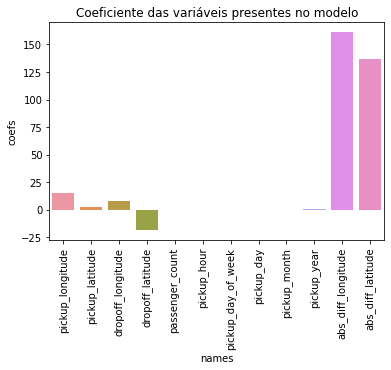

In [ ]:
sns.barplot(weights.names, weights.coefs).set_title("Coeficiente das variáveis presentes no modelo");
plt.xticks(rotation=90);

Aqui podemos ver que os coeficientes maiores são os relacionados às features com a diferença absoluta entre as latitudes e longitudes.

Mas será que faz sentido deixar essas features correlacionadas e que já estão presentes em outras features que criamos, como a pickup_longitude?

Podemos treinar mais um modelo de regressão linear múltipla, mas dessa vez removendo as features correlacionadas:

In [ ]:
lm.fit(X_train[['passenger_count', 'pickup_hour', 'pickup_day_of_week', 'pickup_day',
       'pickup_month', 'pickup_year','abs_diff_longitude', 'abs_diff_latitude']], Y_train)

LinearRegression()

In [ ]:
Y_pred = lm.predict(X_test[['passenger_count', 'pickup_hour', 'pickup_day_of_week', 'pickup_day',
       'pickup_month', 'pickup_year','abs_diff_longitude', 'abs_diff_latitude']])

In [ ]:
mae = mean_absolute_error(Y_test, Y_pred)
mae

2.3660051393119104

In [ ]:
r2_score(Y_test, Y_pred)

0.7738888492753323